In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math 
from csv import reader 
from collections import Counter


In [2]:
def testDataSet(trainingSet,testSet):
    print(trainingSet.shape)
    print(testSet.shape)
    testSize = testSet.shape[0]
    dims = testSet.shape[1] - 1
    dimM = list()
    dimC = list()
    predictions = list()
    meanY = np.mean(trainingSet[:,dims])
    for i in range(0,dims):
        meanX = np.mean(trainingSet[:,i])
        sxy = 0
        sxx = 0
        for j in range(0,dims):
            sxy += (trainingSet[j,i] - meanX) * (trainingSet[j,dims]-meanY)
            sxx += (trainingSet[j,i] - meanX) **2
        dimM.append(sxy/sxx)
        dimC.append(meanY - (dimM[i] * meanX))
    RMSE = 0.0;
    for i in range(0,testSize):
        yPredVal = 0
        for j in range(0,dims):
            yPredVal += (dimM[j]*testSet[i,j])+dimC[j]
        yPredVal = yPredVal/dims
        yVal = testSet[i,dims]
        RMSE += ((yPredVal - yVal) **2)
    RMSE = RMSE / testSize
    RMSE = math.sqrt(RMSE)
    print('RMSE: ',RMSE)
    return dimM, dimC
     

In [3]:
def buildToyDataSet():
    ToyDat = np.random.uniform(low=0.1, high=1, size=(200,2))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(0,200):
        ToyDat[i,1] = ToyDat[i,0] * 2.5 + np.random.uniform(low=0.05,high=0.35,size=(1))
        plot1 = ax.scatter(ToyDat[i,0], ToyDat[i,1], alpha=0.8, c='red', edgecolors='none', s=30,marker="*")
    ToyTest = np.random.uniform(low=0.1, high=1, size=(10,2))
    for i in range(0,10):
        ToyTest[i,1] = ToyTest[i,0] * 2.5+ np.random.uniform(low=0.05,high=0.35,size=(1))
        plot2 = ax.scatter(ToyTest[i,0], ToyTest[i,1], alpha=0.8, c='blue', edgecolors='none', s=30,marker="+")
    plot1.set_label('Training data')
    plot2.set_label('Test data')
    ax.legend()
    return ToyDat, ToyTest

In [4]:
filename = '/Desktop/CM50264/sarcos_inv.csv'
dataset = list()
with open(filename,'r') as file:
    csv_reader = reader(file)
    for row in csv_reader:
        if not row:
            continue
        dataset.append(row)
dataset = np.asarray(dataset, dtype=np.float32)
dims = dataset.shape[1]
testDataset = np.zeros([100,dims])
sampleDataset = np.zeros([20000,dims])
for i in range(1000,21000):
    sampleDataset[(i-1000),:] = dataset[(i-1000),:]
for i in range(0,100):
    testDataset[i,:] = dataset[i,:]
dimM, dimC = testDataSet(sampleDataset,testDataset)

(20000, 22)
(100, 22)
RMSE:  21.972021039102803


(200, 2)
(10, 2)
RMSE:  0.09601969051276356


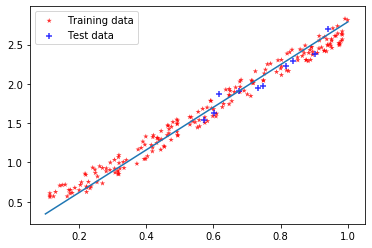

In [5]:
trainingToy,testingToy  = buildToyDataSet();
dimM, dimC = testDataSet(trainingToy,testingToy)
x = np.linspace(0.1,1).reshape(-1,1)
plt.plot(x,(dimM[0]*x+dimC[0]))
plt.show()